### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing Dataset

In [5]:
dataset = pd.read_pickle("emotion_dataset.pkl", compression='infer')
dataset.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


### Dimensions Of Dataset

In [13]:
rows, cols = dataset.shape
print(f'Emotion Dataset Contains {rows} rows and {cols} columns')

Emotion Dataset Contains 416809 rows and 2 columns


### Visualize unique and Duplicates Entities in  Dataset

<AxesSubplot: xlabel='Rows'>

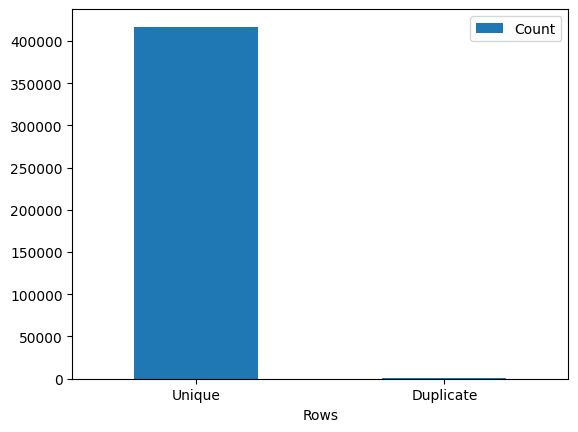

In [17]:
dup_rows = rows - len(dataset.drop_duplicates(subset=['text', 'emotions']))
dup_vis = pd.DataFrame({'Rows':['Unique', 'Duplicate'], 'Count':[rows, dup_rows]})
dup_vis.plot.bar(x='Rows', y='Count', rot=0)

### Remove Duplicates Entities of the Dataset

In [20]:
dataset = dataset.drop_duplicates(subset=['text', 'emotions'])
print(f"After dropping duplicate rows the remaining rows x cols of the dataset are {dataset.shape[0]} x {dataset.shape[1]}") 

After dropping duplicate rows the remaining rows x cols of the dataset are 416123 x 2
